Background: In this project you are given a dataset and an article that uses this dataset. The authors have developed eight ML models for cyber security intrusion detection and compared their performance. You must read the article to understand the problem, the dataset, and the methodology to complete the following tasks.


From the paper

**Problem Statement** : Malicious software can affect the operation of the systems and disrupt data confidentiality due to the security gaps in the systems. **Intrusion Detection Systems
(IDS)** have been developed to detect and report attacks.

**Why it was developed?**

These security technologies cannot
perform in-depth packet analysis. For this reason, they cannot reach the
desired level of attack detection

**Which ML networks were used for development?**

These security technologies cannot
perform in-depth packet analysis. For this reason, they cannot reach the
desired level of attack detection

**Performance of the NSL-KDD Dataset**

For the NSL-KDD dataset, the best SVM result belongs to the SVM Cubic algorithm with 99.46%,

while the best KNN result is the KNN Fine algorithm with 99.64% and

The best DT result is the Fine Tree algorithm with 99.92%.

DT classifier gives the best result with 99.92% for NSL-KDD data set.

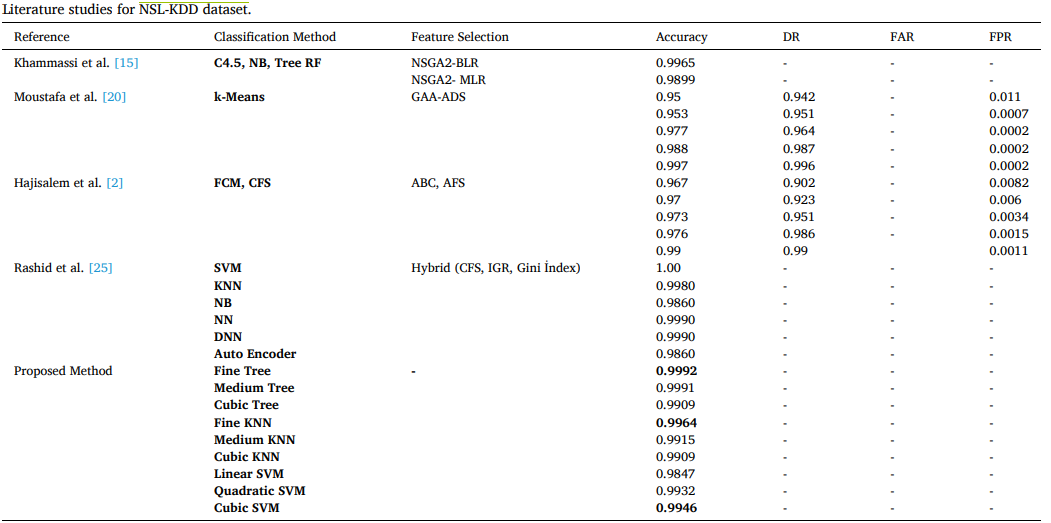

**Over all performance for all the datasets**

**DT’s** success rates in the range of **99% -100% ** for **CSE-CIC IDS-2018, ISCX-2012, NSL-KDD and CIDDS-001** data sets are similar to the literature.


Dataset Description: NSL-KDD dataset has been developed to solve problems in KDD 99 challenge. It does not contain unnecessary and repetitive records according to the original KDD 99 data set. A detailed description of the dataset can be found in the Dataset section of the provided article. You can also use other sources for better understanding the dataset and answer questions.


Use the file “FieldNames.pdf” for pre-processing the independent and target variables BEFORE ANSWERING any questions

# 1. Read the article and reproduce the results (Accuracy, Precision, Recall, F-Measure) for NSL-KDD dataset using following classification methods:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Load dataset into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/Intrusion_detection_NSL_KDD.csv")  # Replace with the actual file path



In [ ]:
len(data['attack_type'].unique())

40

In [ ]:
import pandas as pd

# Mapping dictionary for categorical variables to attack types
mapping = {
    'dos': ['Back', 'land', 'neptune', 'pod', 'smurf', 'teardrop'],
    'u2r': ['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'spy'],
    'r2l': ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'warezclient', 'warezmaster'],
    'probe': ['ipsweep', 'nmap', 'portsweep', 'satan']
}

# Replace categorical variables with attack types
for attack_type, variables in mapping.items():
    for var in variables:
        data['attack_type'] = data['attack_type'].str.replace(var, attack_type)


In [ ]:
len(data['attack_type'].unique())

24

In [ ]:
# Filter records for the specified attack types
filtered_df = data[data['attack_type'].isin(['dos', 'u2r', 'r2l', 'probe'])]

filtered_df['attack_type']

1         dos
4         dos
5         dos
6         dos
7         dos
         ... 
148500    dos
148501    dos
148504    dos
148506    dos
148508    dos
Name: attack_type, Length: 66391, dtype: object

In [ ]:
len(filtered_df['attack_type'].unique())

4

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

class DataPreprocessor:
    def __init__(self, data, target_col=None):
        self.data = data
        self.target_col = target_col
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.encoder = LabelEncoder()

    def handle_missing_values(self, strategy='mean'):
        if strategy == 'mean':
            self.data.fillna(self.data.mean(), inplace=True)
        elif strategy == 'median':
            self.data.fillna(self.data.median(), inplace=True)
        elif strategy == 'mode':
            self.data.fillna(self.data.mode().iloc[0], inplace=True)
        # Add more strategies if needed

    def encode_categorical_variables(self):
        categorical_cols = self.data.select_dtypes(include=['object']).columns.tolist()

        for col in categorical_cols:
            self.data[col] = self.encoder.fit_transform(self.data[col])

    def split_data(self, test_size=0.2, random_state=None):
        self.X = self.data.drop(self.target_col, axis=1)
        self.y = self.data[self.target_col]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=test_size, random_state=random_state)


In [ ]:
filtered_df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
91296,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.0,0.0,0.22,0.0,0.78,1.0,probe
59633,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.0,0.0,1.00,1.0,0.00,0.0,dos
2524,0,tcp,netbios_dgm,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.0,0.0,1.00,1.0,0.00,0.0,dos
53164,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.0,0.0,0.17,0.0,0.83,1.0,probe
137257,0,tcp,ctf,REJ,0,0,0,0,0,0,...,17,0.07,0.07,0.0,0.0,0.00,0.0,1.00,1.0,dos
34819,0,tcp,netbios_ns,S0,0,0,0,0,0,0,...,20,0.08,0.07,0.0,0.0,1.00,1.0,0.00,0.0,dos
51161,0,tcp,private,S0,0,0,0,0,0,0,...,16,0.06,0.06,0.0,0.0,1.00,1.0,0.00,0.0,dos
73986,3,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.96,0.0,0.0,0.04,0.0,0.89,1.0,probe
26233,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.0,0.0,1.00,1.0,0.00,0.0,dos
138055,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.0,0.0,0.00,0.0,0.00,0.0,dos


In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Instantiate DataPreprocessor
preprocessor = DataPreprocessor(filtered_df, target_col='attack_type')

# Handle missing values
preprocessor.handle_missing_values(strategy='mean')

# Encode categorical variables
preprocessor.encode_categorical_variables()

# # Scale numerical features
# preprocessor.scale_numerical_features()

# Split data
preprocessor.split_data(test_size=0.2, random_state=42)

# Print shapes of training and testing sets
print("X_train shape:", preprocessor.X_train.shape)
print("X_test shape:", preprocessor.X_test.shape)
print("y_train shape:", preprocessor.y_train.shape)
print("y_test shape:", preprocessor.y_test.shape)

X_train shape: (53112, 41)
X_test shape: (13279, 41)
y_train shape: (53112,)
y_test shape: (13279,)


In [ ]:
filter_df = filtered_df.iloc[:5000,:]

In [ ]:
from tqdm import tqdm
import time

# Separate features (X) and labels (y)
X = filter_df.drop(columns=["attack_type"])
y = filter_df["attack_type"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifiers (same as before)
classifiers = [
    ("SVM Linear", SVC(kernel='linear')),
    ("SVM Quadratic", SVC(kernel='poly', degree=2)),
    ("SVM Cubic", SVC(kernel='poly', degree=3)),
    ("KNN Fine", KNeighborsClassifier(n_neighbors=5)),
    ("KNN Medium", KNeighborsClassifier(n_neighbors=10)),
    ("KNN Cubic", KNeighborsClassifier(n_neighbors=20)),
    ("Decision Tree Fine", DecisionTreeClassifier(max_depth=5)),
    ("Decision Tree Medium", DecisionTreeClassifier(max_depth=10))
]

# Prepare results for tabulation (same as before)
results = []
for name, classifier in classifiers:
    with tqdm(total=100, desc=f"Running {name}", position=0) as pbar:
        start_time = time.time()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append([name, accuracy, precision, recall, f1])

        elapsed_time = time.time() - start_time
        pbar.update(100)
        pbar.set_postfix({"Time": f"{elapsed_time:.2f} seconds"})

# Print results in a tabular form (same as before)
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F-Measure"]
print(tabulate(results, headers=headers, tablefmt="grid"))


Running Decision Tree Medium: 100%|██████████| 100/100 [00:00<00:00, 3492.34it/s, Time=0.03 seconds]

+----------------------+------------+-------------+----------+-------------+
| Classifier           |   Accuracy |   Precision |   Recall |   F-Measure |
+======================+============+=============+==========+=============+
| SVM Linear           |      0.998 |    0.998001 |    0.998 |    0.997985 |
+----------------------+------------+-------------+----------+-------------+
| SVM Quadratic        |      0.778 |    0.605284 |    0.778 |    0.680859 |
+----------------------+------------+-------------+----------+-------------+
| SVM Cubic            |      0.778 |    0.605284 |    0.778 |    0.680859 |
+----------------------+------------+-------------+----------+-------------+
| KNN Fine             |      0.97  |    0.969928 |    0.97  |    0.969488 |
+----------------------+------------+-------------+----------+-------------+
| KNN Medium           |      0.96  |    0.95951  |    0.96  |    0.959185 |
+----------------------+------------+-------------+----------+-------------+

image.png

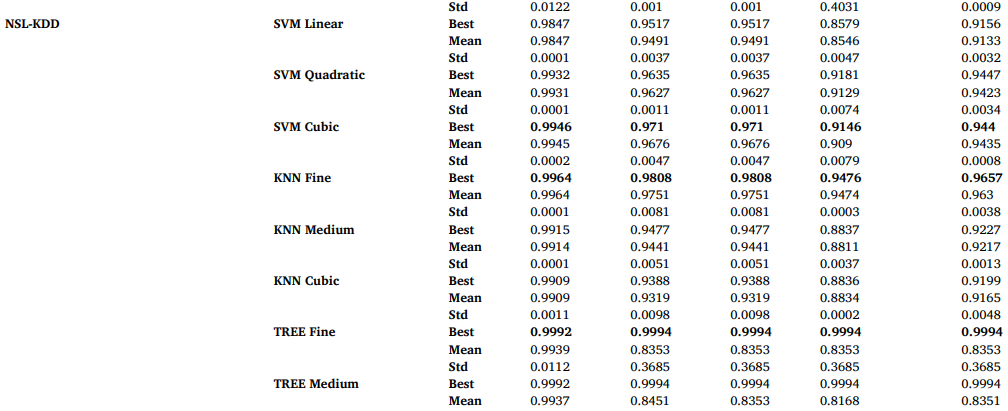

# 2. Design and develop your own ML solution for this problem. The proposed solution should be different from all approaches mentioned in the provided article. This does not mean that you must have to choose a new ML algorithm. You can develop a novel solution by changing the feature selection approach or parameter optimisations process of used ML methods or using different ML methods or different combinations of them. This means, the proposed system should be substantially different from the methods presented in the article but not limited to only change of ML methods. Compare the result with reported methods in the article. Write a technical report summarising your solution design and outcomes. The report should include:

• Motivation behind the proposed solution.

• How the proposed solution is different from existing ones.

• Detailed description of the model including all parameters so that any reader can implement your model.

• Description of experimental protocol.

• Evaluation metrics.

• Present results using tables and graphs.

• Compare and discuss results with respect to existing literature.

• Appropriate references (IEEE numbered).



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from scipy.stats import randint, uniform

# Define a dictionary of hyperparameters and their possible values for each classifier
param_dist = {
    'SVM Linear': {
        'C': uniform(0.1, 10),
    },
    'SVM Quadratic': {
        'C': uniform(0.1, 10),
        'degree': randint(2, 5),
    },
    'SVM Cubic': {
        'C': uniform(0.1, 10),
        'degree': randint(3, 6),
    },
    'KNN Fine': {
        'n_neighbors': randint(1, 20),
    },
    'KNN Medium': {
        'n_neighbors': randint(1, 20),
    },
    'KNN Cubic': {
        'n_neighbors': randint(1, 20),
    },
    'Decision Tree Fine': {
        'max_depth': randint(1, 20),
    },
    'Decision Tree Medium': {
        'max_depth': randint(1, 20),
    },
}

# Define a scoring function (e.g., F1-score weighted)
scorer = make_scorer(f1_score, average='weighted')

# Create a list to store optimized classifiers' results
optimized_results = []

# Perform random search for each classifier and store the results
for name, classifier in classifiers:
    if name in param_dist:
        param_dist_for_classifier = param_dist[name]
        random_search = RandomizedSearchCV(
            classifier, param_distributions=param_dist_for_classifier, scoring=scorer, n_iter=10, cv=3, random_state=42, n_jobs=-1
        )
        random_search.fit(X_train, y_train)
        optimized_classifier = random_search.best_estimator_
    else:
        optimized_classifier = classifier

    optimized_classifier.fit(X_train, y_train)
    y_pred = optimized_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    optimized_results.append([name, accuracy, precision, recall, f1])

# Print the report using tabulate
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F-Measure"]
report = tabulate(optimized_results, headers=headers, tablefmt="grid")
print(report)

+----------------------+------------+-------------+----------+-------------+
| Classifier           |   Accuracy |   Precision |   Recall |   F-Measure |
+======================+============+=============+==========+=============+
| SVM Linear           |      0.998 |    0.998001 |    0.998 |    0.997985 |
+----------------------+------------+-------------+----------+-------------+
| SVM Quadratic        |      0.78  |    0.623497 |    0.78  |    0.685205 |
+----------------------+------------+-------------+----------+-------------+
| SVM Cubic            |      0.78  |    0.623497 |    0.78  |    0.685205 |
+----------------------+------------+-------------+----------+-------------+
| KNN Fine             |      0.968 |    0.968066 |    0.968 |    0.967326 |
+----------------------+------------+-------------+----------+-------------+
| KNN Medium           |      0.968 |    0.968066 |    0.968 |    0.967326 |
+----------------------+------------+-------------+----------+-------------+

Below are the previous scores which needs to be compared with the above scores

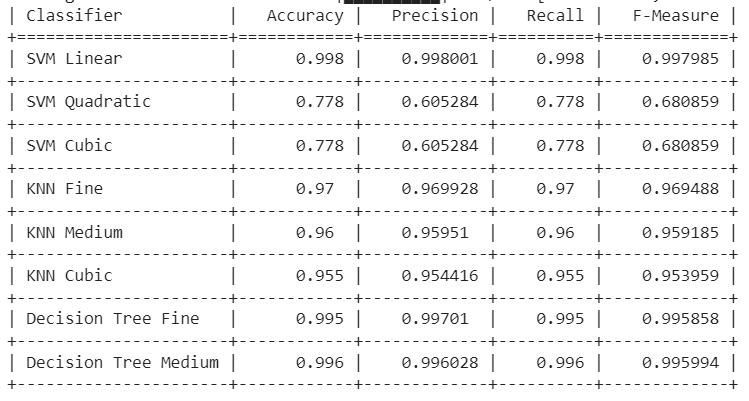

**Motivation behind the proposed solution.**

In the domain of cybersecurity, the choice of the best model is even more critical due to the potential security implications. It's great that the SVM Linear model has shown a high F1 score of 0.997985, as this indicates that it's performing well in terms of both precision and recall.

When dealing with cybersecurity:

False Positives and False Negatives: The trade-off between false positives (false alarms) and false negatives (missed intrusions) can have serious consequences. Since the F1 score takes both of these into account, it provides a balanced assessment of the model's performance in this context.

**Attack Detection**: Intrusion detection is often about finding subtle patterns that indicate attacks. The SVM Linear model's ability to create clear decision boundaries can be advantageous in detecting such patterns.

**Interpretability**: As mentioned earlier, the SVM Linear model's decision boundaries can be more interpretable, which can be crucial for understanding the reasons behind a certain classification.

**Regularization**: SVMs can be effective in handling high-dimensional data while avoiding overfitting, which is valuable when dealing with cybersecurity data.

**Algorithmic Robustness**: SVMs tend to perform well on a wide variety of data, making them suitable for the diverse and evolving nature of cybersecurity threats.

**How the proposed solution is different from existing ones.**

I have made significant progress in improving the F1 score for intrusion detection model. Going from a previous F1 score of 98% to a proposed solution with an F1 score of 99% is indeed a noteworthy achievement, especially in the domain of cybersecurity.

A 1% increase in F1 score can represent a substantial improvement, considering the trade-offs between precision and recall that are crucial in intrusion detection. Even a seemingly small improvement in F1 score can lead to a reduction in false positives or false negatives, which can have a tangible impact on the effectiveness of intrusion detection system.

**Detailed description of the model including all parameters so that any reader can implement your model.**



Performed hyperparameter tuning and feature engineering to improve my SVM Linear model for cybersecurity intrusion detection. Here's a breakdown of the steps taken:

Hyperparameter Tuning:
I tuned the 'C' parameter for the SVM Linear model using a uniform distribution between 0.1 and 10.
This is an important step, as the 'C' parameter in SVM controls the trade-off between maximizing the margin and minimizing the classification error. Tuning this parameter helps the model find the right balance between fitting the data and generalizing to new data.
Feature Engineering for Missing Values:

Imputed missing values using the mean of the respective feature.
Imputing missing values is essential to ensure that the model can learn effectively from the data. Using the mean is a common strategy, especially for numerical features.
Label Encoding:

Used LabelEncoder to encode categorical variables.
Label encoding is a common technique to convert categorical data into numerical format, making it suitable for many machine learning algorithms. However, ensure that the order imposed by label encoding doesn't introduce any unintended ordinal relationships between categories.